In [3]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
import utils
import spacy
from tqdm import tqdm
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import normalize
import spacy

nlp = spacy.load("en_core_web_sm")

In [11]:
movies_df = pd.read_csv("data/IMDb movies.csv")
movies_df = movies_df[~movies_df["description"].isna()]
movies_df.head(5)

c:\users\vsmaxim8\appdata\local\pypoetry\cache\virtualenvs\data-analysis-2021-qihzqfsf-py3.9\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [12]:
with open("fasttext-vecs", "w") as fd:
    for i, row in tqdm(movies_df.iterrows()):
        vector = nlp(row["description"]).vector
        fd.write(f"{row['imdb_title_id']}, {list(vector)}\n")

83740it [17:26, 80.00it/s]


In [14]:
vector.shape

(96,)

In [2]:
merged_df

NameError: name 'merged_df' is not defined

In [5]:
qty_features = merged_df[numeric_values].fillna(0).to_numpy()

In [6]:
text_vecs = []

with open("fasttext-vecs", "w""):
    for i, row in tqdm(merged_df.terrows):
        text_vecs.append(nlp(i).vector)

text_vecs = np.array(text_vecs)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 85.14it/s]


In [7]:
text_vecs

array([[ 0.8291465 ,  0.09824685, -0.19965482, ..., -0.00102247,
         0.27990526,  0.06820183],
       [ 0.42091656,  0.3631932 ,  0.08257481, ..., -0.14435457,
         0.0833737 , -0.19834349],
       [ 0.57262176,  0.09851746, -0.23256713, ...,  0.21245301,
         0.17797296, -0.23004293],
       ...,
       [ 0.32703018, -0.0118    , -0.05054956, ...,  0.10477297,
         0.09952083, -0.18214878],
       [ 0.5877475 ,  0.22015046, -0.32040524, ...,  0.09754117,
         0.12101261, -0.2064617 ],
       [ 0.8492841 ,  0.23243381, -0.30752844, ..., -0.03120757,
         0.12610452, -0.13245483]], dtype=float32)

In [8]:
qty_features[0]

array([ 13. ,  36. ,   5.9,   6. ,  70. ,   6.2,   7. ,   1. ,  31. ,
       154. ,  43. ,  14. ,   5. ,  34. ,   5.9,  50. ,  38. ,   6.6,
         5.9,   9. ,   4. ,   1. ,   5.7,  12. ,   7.2,   4. ,  24. ,
         7.3,  28. ,   6.4,   6. ,   3. ,  51. ,   5.6,  28. ,   5.7,
         5.7,   6.7,  35. ,   6. ,   4.5,  97. ,  14. ,  10. ,  35. ,
         4. ,   5.9])

In [77]:
vectors = normalize(text_vecs)

In [78]:
vectors.shape

(1000, 96)

In [79]:
normalize(vectors)

array([[ 2.6975706e-01,  3.1963930e-02, -6.4956307e-02, ...,
        -3.3265448e-04,  9.1065228e-02,  2.2188989e-02],
       [ 1.5131441e-01,  1.3056356e-01,  2.9684642e-02, ...,
        -5.1893715e-02,  2.9971834e-02, -7.1302079e-02],
       [ 3.1947425e-01,  5.4964367e-02, -1.2975268e-01, ...,
         1.1853071e-01,  9.9293776e-02, -1.2834440e-01],
       ...,
       [ 1.4695659e-01, -5.3025316e-03, -2.2715308e-02, ...,
         4.7081523e-02,  4.4721384e-02, -8.1851661e-02],
       [ 2.8442952e-01,  1.0653774e-01, -1.5505418e-01, ...,
         4.7203239e-02,  5.8561813e-02, -9.9913314e-02],
       [ 3.6168343e-01,  9.8986261e-02, -1.3096671e-01, ...,
        -1.3290322e-02,  5.3703953e-02, -5.6408353e-02]], dtype=float32)

In [80]:
np.linalg.norm(vectors[2] - vectors[5])

1.0525552

In [229]:
from collections import Counter
def print_cluster_info(labels):
    print("Noc", labels.max())
    print("Counts", Counter(labels))
    print(f"dbs {davies_bouldin_score(vectors, labels)}")
    print(f"sillhouette {silhouette_score(vectors, labels)}")
    print(f"chs {calinski_harabasz_score(vectors, labels)}")

In [258]:
dbscan_clusters = DBSCAN(eps=0.59, min_samples=5).fit_predict(vectors)
print_cluster_info(dbscan_clusters)

Noc 1
Counts Counter({-1: 731, 0: 265, 1: 4})
dbs 4.0361795202889965
sillhouette -0.06138163059949875
chs 14.853781015779127


In [231]:
dbscan_clusters2 = DBSCAN(eps=0.7, min_samples=4).fit_predict(vectors)
print_cluster_info(dbscan_clusters2)

Noc 0
Counts Counter({0: 819, -1: 181})
dbs 4.90905728141849
sillhouette 0.09580100327730179
chs 27.06961092760094


In [252]:
dbscan_clusters3 = DBSCAN(eps=0.8, min_samples=5).fit_predict(vectors)
print_cluster_info(dbscan_clusters3)

Noc 0
Counts Counter({0: 973, -1: 27})
dbs 3.364003636860676
sillhouette 0.17013461887836456
chs 11.16333065827383


In [261]:
agglomerative_clusters = AgglomerativeClustering(n_clusters=None, distance_threshold=0.75).fit_predict(vectors)
agglomerative_1 = AgglomerativeClustering(n_clusters=None, distance_threshold=0.75).fit(vectors)
print_cluster_info(agglomerative_clusters)

Noc 479
Counts Counter({14: 9, 94: 7, 17: 7, 34: 7, 32: 6, 137: 6, 71: 6, 4: 6, 243: 5, 410: 5, 84: 5, 13: 5, 127: 5, 152: 5, 48: 5, 131: 5, 368: 5, 124: 5, 158: 5, 122: 5, 29: 5, 81: 5, 157: 5, 66: 5, 266: 4, 342: 4, 171: 4, 27: 4, 54: 4, 33: 4, 130: 4, 274: 4, 265: 4, 72: 4, 9: 4, 181: 4, 104: 4, 43: 4, 99: 4, 40: 4, 56: 4, 91: 4, 166: 4, 95: 4, 78: 4, 135: 4, 170: 4, 128: 4, 155: 4, 149: 3, 62: 3, 120: 3, 293: 3, 42: 3, 191: 3, 165: 3, 207: 3, 220: 3, 163: 3, 204: 3, 279: 3, 132: 3, 123: 3, 359: 3, 100: 3, 146: 3, 139: 3, 172: 3, 12: 3, 75: 3, 58: 3, 153: 3, 188: 3, 92: 3, 19: 3, 369: 3, 196: 3, 5: 3, 30: 3, 450: 3, 323: 3, 388: 3, 173: 3, 211: 3, 87: 3, 222: 3, 76: 3, 36: 3, 103: 3, 180: 3, 44: 3, 0: 3, 150: 3, 239: 3, 125: 3, 394: 3, 23: 3, 50: 3, 35: 3, 60: 3, 88: 3, 297: 3, 154: 3, 64: 3, 272: 3, 414: 3, 189: 3, 85: 3, 93: 3, 49: 3, 254: 3, 159: 3, 133: 3, 70: 3, 21: 3, 3: 3, 46: 3, 202: 3, 195: 3, 109: 3, 168: 3, 68: 3, 145: 3, 51: 3, 126: 3, 7: 3, 340: 3, 108: 3, 276: 2, 117: 

In [270]:
agglomerative_clusters2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0.8).fit_predict(vectors)
agglomerative_2 = AgglomerativeClustering(n_clusters=None, distance_threshold=0.75).fit(vectors)
print_cluster_info(agglomerative_clusters2)

Noc 395
Counts Counter({122: 9, 70: 8, 189: 7, 28: 7, 71: 7, 66: 7, 69: 7, 81: 7, 11: 6, 21: 6, 133: 6, 73: 6, 137: 6, 115: 6, 144: 6, 19: 6, 90: 6, 25: 5, 12: 5, 204: 5, 3: 5, 231: 5, 47: 5, 35: 5, 152: 5, 196: 5, 22: 5, 131: 5, 368: 5, 124: 5, 317: 5, 245: 5, 243: 5, 164: 5, 29: 5, 316: 5, 92: 4, 342: 4, 171: 4, 114: 4, 30: 4, 53: 4, 222: 4, 67: 4, 39: 4, 5: 4, 274: 4, 265: 4, 145: 4, 9: 4, 79: 4, 181: 4, 210: 4, 45: 4, 175: 4, 199: 4, 32: 4, 165: 4, 27: 4, 113: 4, 184: 4, 166: 4, 84: 4, 192: 4, 158: 4, 31: 4, 135: 4, 170: 4, 128: 4, 299: 3, 126: 3, 120: 3, 293: 3, 173: 3, 332: 3, 207: 3, 220: 3, 327: 3, 7: 3, 279: 3, 266: 3, 17: 3, 123: 3, 359: 3, 18: 3, 294: 3, 43: 3, 346: 3, 52: 3, 51: 3, 151: 3, 118: 3, 153: 3, 188: 3, 34: 3, 42: 3, 82: 3, 393: 3, 104: 3, 62: 3, 178: 3, 58: 3, 323: 3, 388: 3, 347: 3, 211: 3, 352: 3, 23: 3, 147: 3, 103: 3, 180: 3, 179: 3, 77: 3, 163: 3, 87: 3, 150: 3, 239: 3, 125: 3, 394: 3, 195: 3, 203: 3, 146: 3, 177: 3, 297: 3, 309: 3, 130: 3, 41: 3, 272: 3, 37

In [256]:
agglomerative_clusters3 = AgglomerativeClustering(n_clusters=None, distance_threshold=2).fit(vectors)
print_cluster_info(agglomerative_clusters3)

Noc 23
Counts Counter({3: 98, 15: 73, 1: 67, 2: 61, 0: 56, 13: 55, 8: 54, 4: 52, 7: 47, 9: 43, 18: 40, 11: 39, 17: 36, 19: 36, 22: 36, 6: 33, 20: 28, 5: 27, 23: 24, 10: 24, 21: 23, 16: 19, 14: 19, 12: 10})
dbs 3.368681901620167
sillhouette 0.00980584416538477
chs 13.93047660083488


In [210]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

In [211]:
print(f"dbscan = {davies_bouldin_score(vectors, dbscan_clusters)}, agg = {davies_bouldin_score(vectors, agglomerative_clusters)})")

dbscan = 1.9014840504613133, agg = 3.368681901620167)


In [212]:
print(f"dbscan = {calinski_harabasz_score(vectors, dbscan_clusters)}, agg = {calinski_harabasz_score(vectors, agglomerative_clusters)})")

dbscan = 2.997260171913904, agg = 13.93047660083488)


In [213]:
print(f"dbscan = {silhouette_score(vectors, dbscan_clusters)}, agg = {silhouette_score(vectors, agglomerative_clusters)})")

dbscan = -0.151129812002182, agg = 0.00980584416538477)


In [159]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from itertools import permutations

def plot_clustering_graphic(embeddings, labels, annotations):
    reduced_embeddings = TSNE(n_components=2, perplexity=5, init='pca', n_iter=3600, random_state=42).fit_transform(embeddings)
    fig, ax = plt.subplots(figsize=(30, 20))
    x, y = np.split(reduced_embeddings, [-1], axis=1)
    ax.scatter(x, y, c=labels)

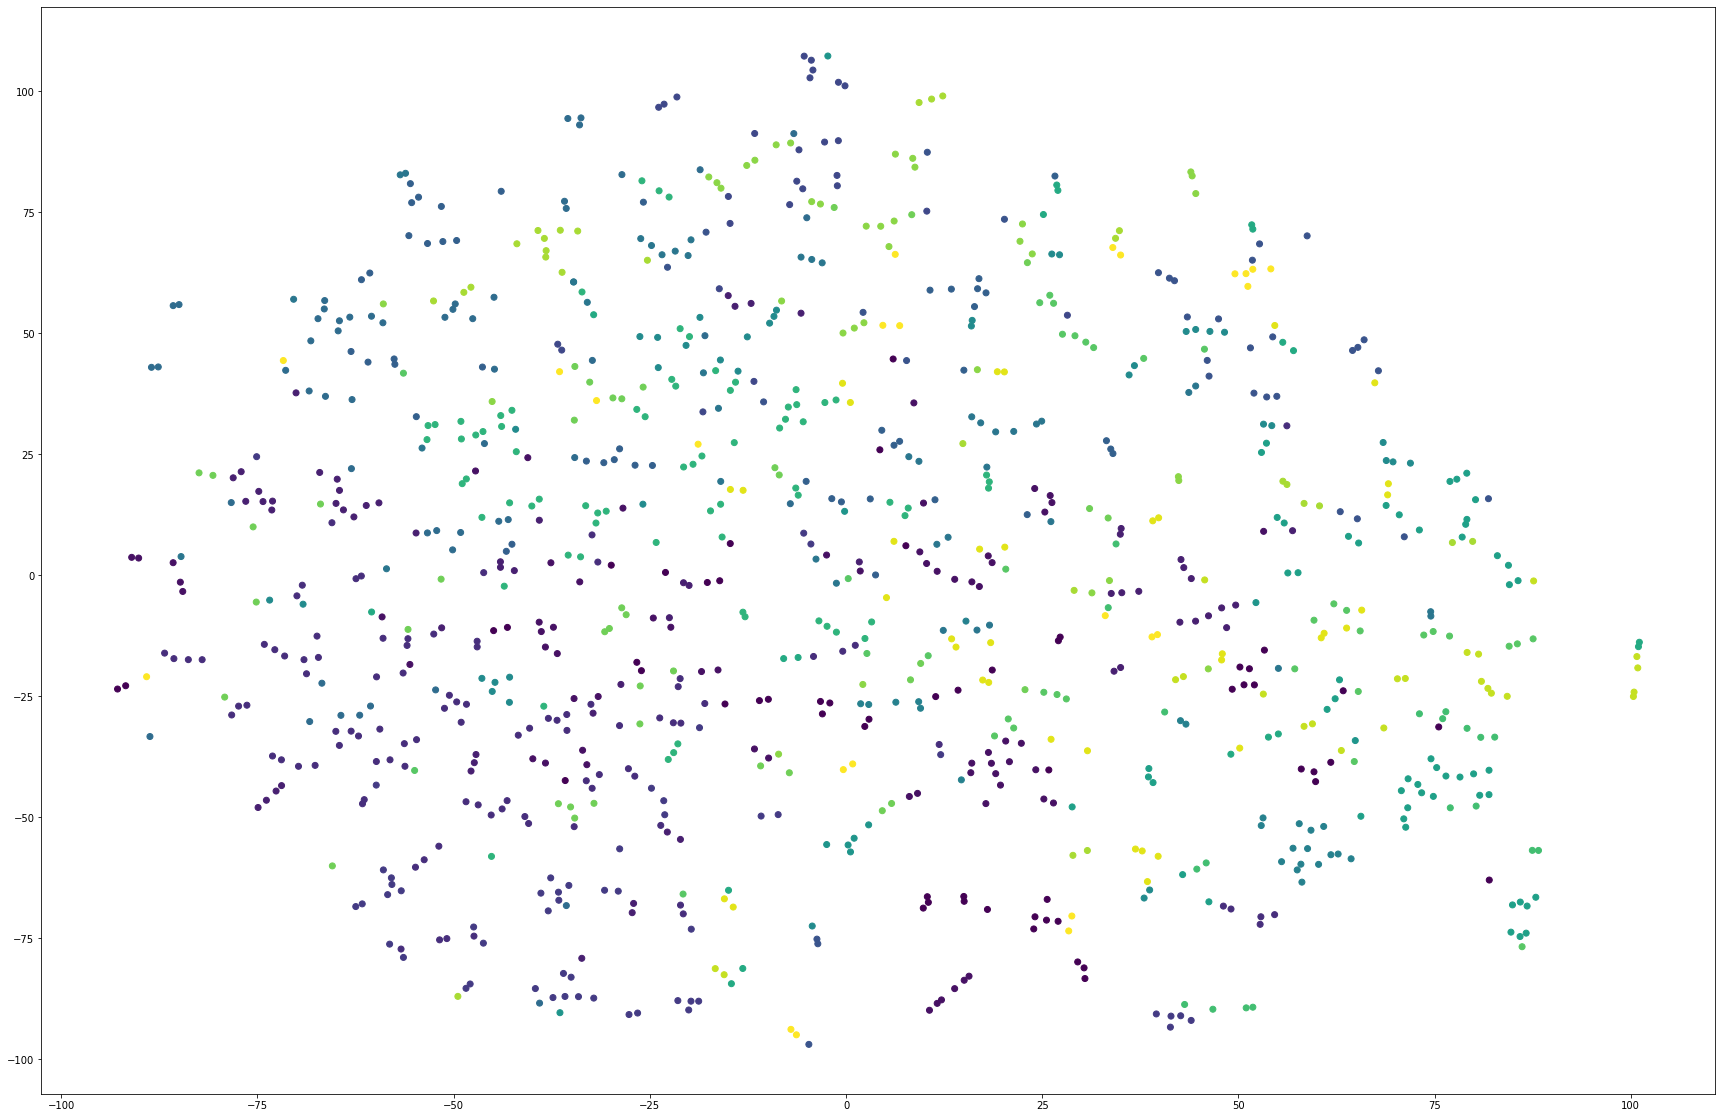

In [160]:
plot_clustering_graphic(vectors, agglomerative_clusters, merged_df["description"].values)

In [168]:
from collections import defaultdict

def print_clustering_descriptions(labels, annotations):
    descriptions = defaultdict(list)
    
    for label, annotation in zip(labels, annotations):
        descriptions[label].append(annotation)
    
    for cluster, descriptions in descriptions.items():
        print(f"Cluster {cluster}")
        for description in descriptions[:5]:
            print(description)

In [274]:
print_clustering_descriptions(agglomerative_clusters, merged_df["description"].values)

Cluster 149
The adventures of a female reporter in the 1890s.
Story of the lives of the people in a small Quaker community and the adventures of a whaling ship.
One of the main works of the Age of Enlightenment, a powerful plea in favour of tolerance, humanity and freedom of opinion. Set in the age of the crusades, it deals with the relations ...
Cluster 276
True story of notorious Australian outlaw Ned Kelly (1855-80).
The movie depicts the Romanian War of Independence (1877-1878).
Cluster 62
Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow her home, ...
David is a poor but ambitious Polish Jew who reinvents himself as a powerful New York business magnate. After gaining wealth, he relocates to Paris, only to have his selfish and demanding wife squander his fortune.
Lucienne, typist and gorgeous bathing beauty, decides to enter the 'Miss Europe' pageant spon

In [170]:
print_clustering_descriptions(dbscan_clusters, merged_df["description"].values)

Cluster 0
The adventures of a female reporter in the 1890s.
The story of Madame DuBarry, the mistress of Louis XV of France, and her loves in the time of the French revolution.
An army pilot is on a visit at the home of another army pilot in the neighboured country. He falls in love with his sister. After the outbreak of a war between the two countries, her ...
Though mistreated by her cruel stepmother and stepsisters, Cinderella is able to attend the royal ball through the help of a fairy godmother.
The young daughter of an army captain missing in action runs away from school and is kidnapped by Parisian lowlifes. When the kidnapper flees to Nice with the child, the kind-hearted employee of one of his accomplices sets off in pursuit.
Cluster -1
True story of notorious Australian outlaw Ned Kelly (1855-80).
Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow he

In [259]:
print_clustering_descriptions(dbscan_clusters2, merged_df["description"].values)

Cluster 0
The adventures of a female reporter in the 1890s.
Two men of high rank are both wooing the beautiful and famous equestrian acrobat Stella. While Stella ignores the jeweler Hirsch, she accepts Count von Waldberg's offer to follow her home, ...
Loosely adapted from Dante's Divine Comedy and inspired by the illustrations of Gustav Doré the original silent film has been restored and has a new score by Tangerine Dream.
An account of the life of Jesus Christ, based on the books of the New Testament: After Jesus' birth is foretold to his parents, he is born in Bethlehem, and is visited by shepherds and wise...
The story of Madame DuBarry, the mistress of Louis XV of France, and her loves in the time of the French revolution.
Cluster -1
True story of notorious Australian outlaw Ned Kelly (1855-80).
The fabled queen of Egypt's affair with Roman general Marc Antony is ultimately disastrous for both of them.
The movie depicts the Romanian War of Independence (1877-1878).
Richard of Glou

In [264]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

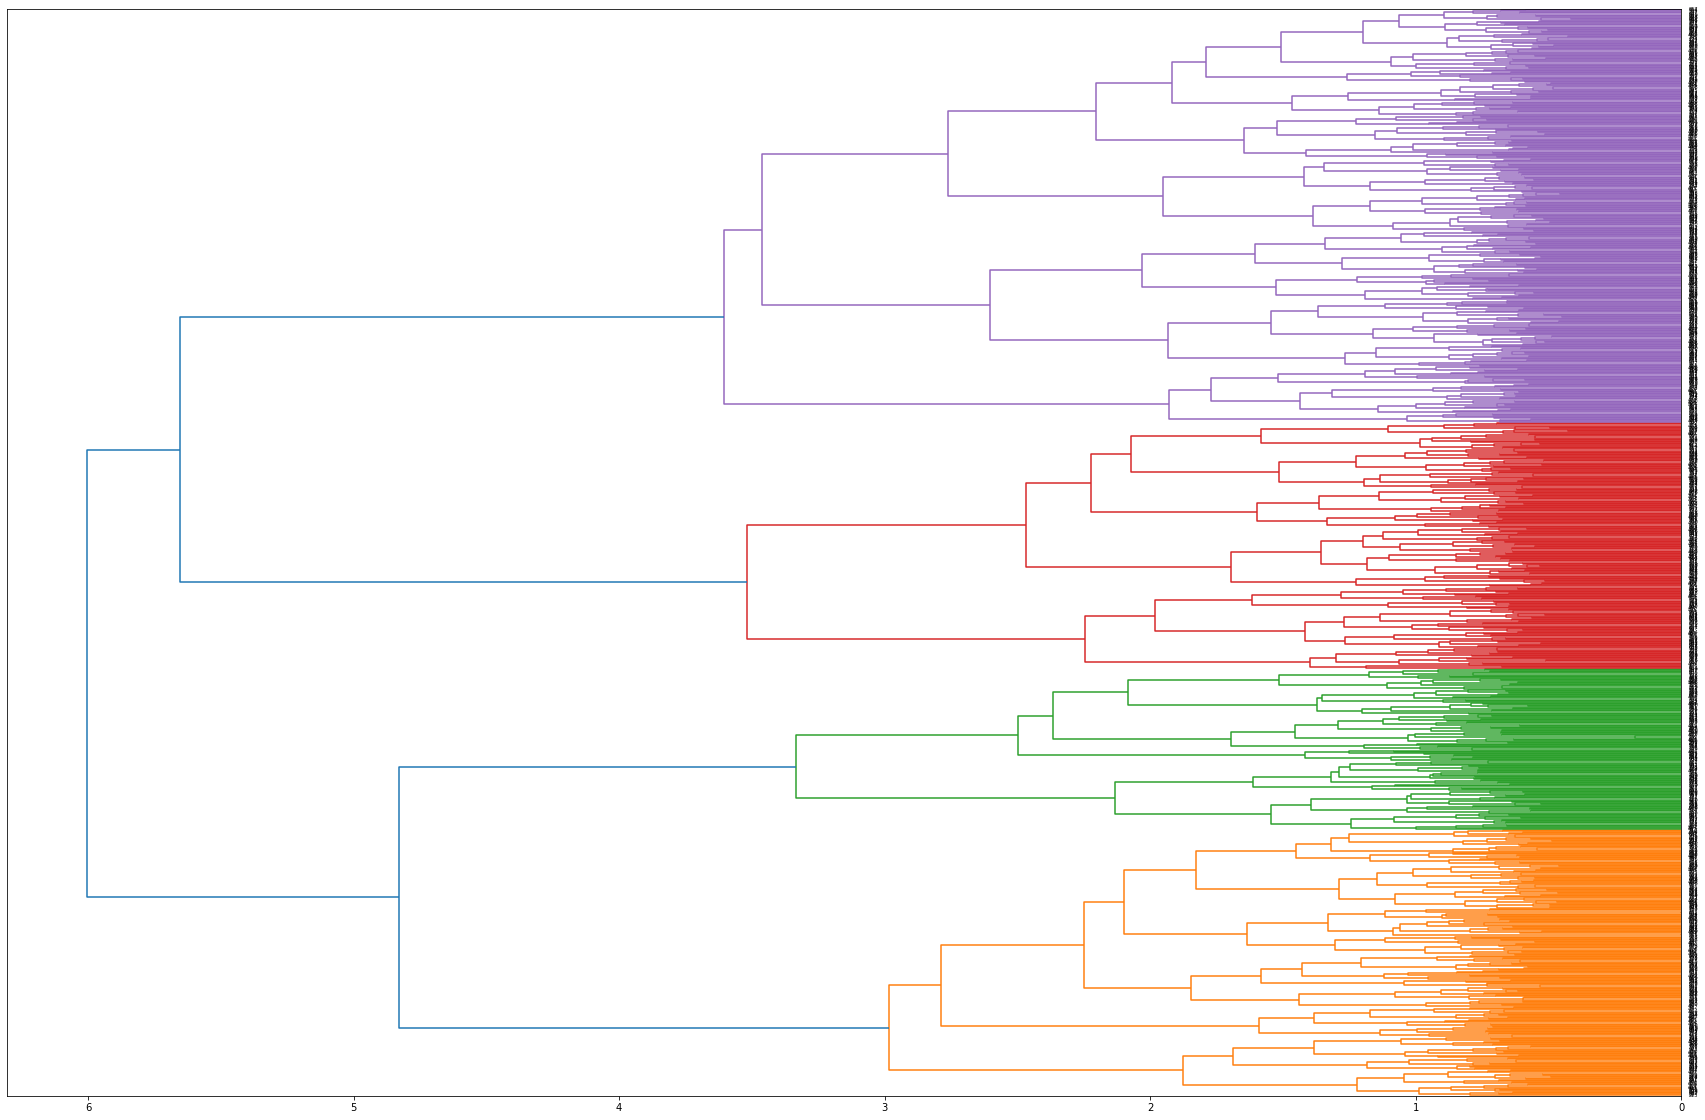

In [269]:
fig, ax = plt.subplots(figsize=(30, 20))
plot_dendrogram(agglomerative_1, orientation="left", ax=ax)

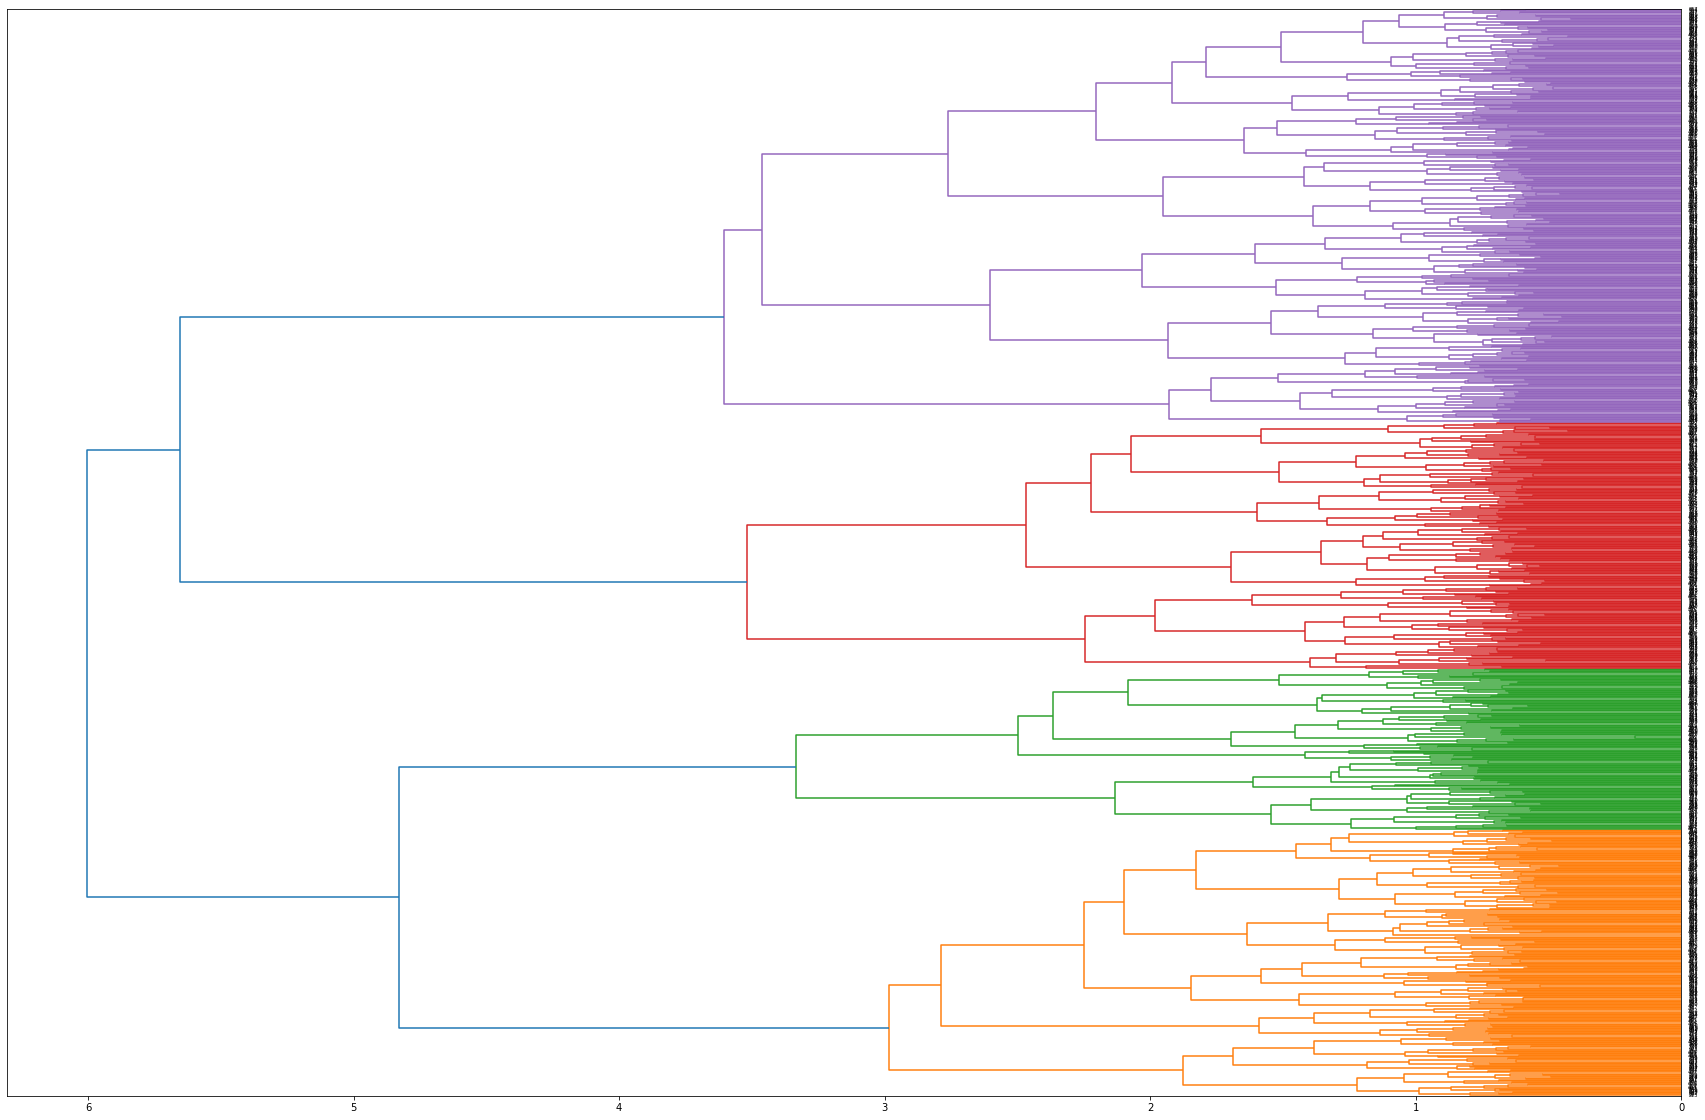

In [271]:

fig, ax = plt.subplots(figsize=(30, 20))
plot_dendrogram(agglomerative_2, orientation="left", ax=ax)